In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
import numpy as np
import matplotlib.pyplot as plt
from tqdm.auto import tqdm

import torch
import torch.nn as nn
from torchvision.datasets import MNIST
from torchvision.transforms import ToTensor
from torch.utils.data.dataloader import DataLoader

sys.path.insert(0, '../src')
from plotters import plot_loss, plot_image

np.random.seed(43)

In [3]:
train_dataset = MNIST(root='../data', train=True, transform=ToTensor(), download=True)

../src\plotters.py:456: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


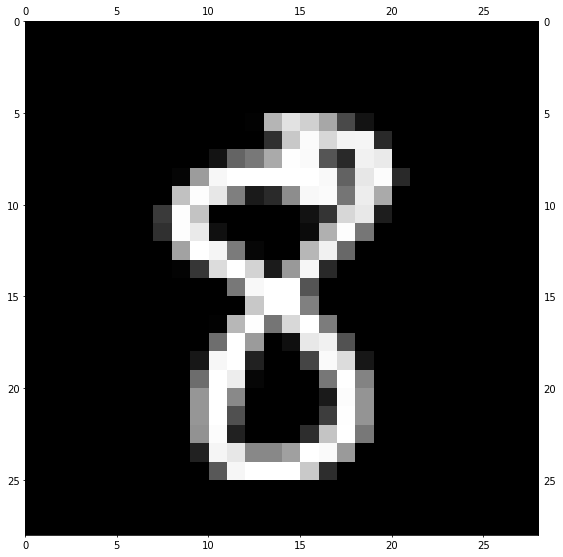

In [4]:
plot_image(train_dataset.data[46].numpy().T)

In [5]:
batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size)

In [6]:
for x, y in train_loader:
    print(x.shape, y.shape)
    break

torch.Size([32, 1, 28, 28]) torch.Size([32])


In [101]:
class LogisticRegression(nn.Module):
    def __init__(self, n_features, n_classes, n_hidden=300):
        super().__init__()
        
        self.linear1 = nn.Linear(n_features, n_hidden)
        
        self.relu = nn.ReLU()
        
        self.linear2 = nn.Linear(n_hidden, n_classes)
        
        self.softmax = nn.Softmax(1)
        
        nn.init.xavier_uniform_(self.linear1.weight)
        nn.init.xavier_uniform_(self.linear2.weight)

    def forward(self, x):
        x1 = self.relu(self.linear1(x))
        return self.softmax(self.linear2(x1))

In [102]:
n_features = 28*28
n_classes = 10

model = LogisticRegression(n_features=n_features, n_classes=n_classes)

In [103]:
loss_fn = nn.CrossEntropyLoss()

In [104]:
lr=5e-3
weight_decay = 0
optimizer = torch.optim.SGD(params=model.parameters(), lr=lr)

In [105]:
loss_list = []
n_epoches = 6
for epoch in tqdm(range(n_epoches)):
    for train_inputs, train_targets in tqdm(train_loader, leave=False):
        train_inputs = train_inputs.reshape((batch_size, n_features))
        optimizer.zero_grad()
        train_predictions = model.forward(train_inputs)
        loss = loss_fn(train_predictions, train_targets)

        loss.backward()

        optimizer.step()

        loss_list.append(loss.detach().numpy().tolist())

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

../src\plotters.py:456: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


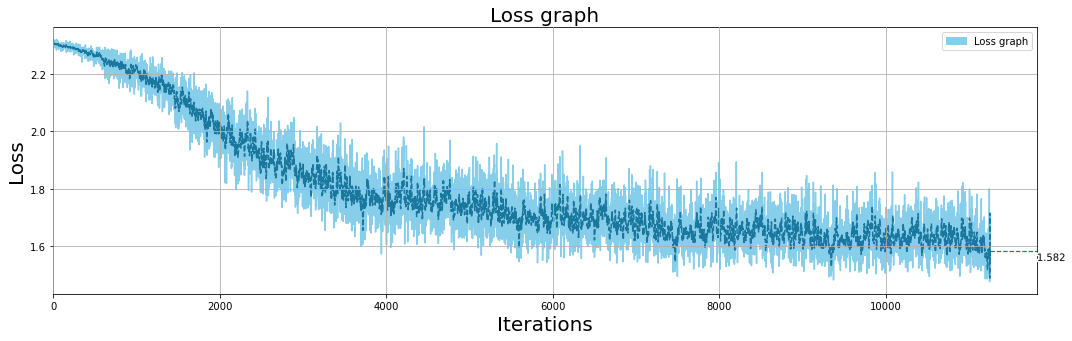

In [106]:
#no wd
plot_loss(loss_list)

In [107]:
#no wd
test_dataset = MNIST(root='../data', train=False, transform=ToTensor(), download=True)

with torch.no_grad():
    y_test_hat_ohe = model(test_dataset.data.reshape(-1, n_features).float())

y_test = test_dataset.targets.numpy()
y_test_hat = y_test_hat_ohe.argmax(1).numpy()

correct = (y_test_hat==y_test)
accuracy = correct.sum() / len(y_test)
accuracy

0.8916

In [14]:
######################################################

../src\plotters.py:456: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


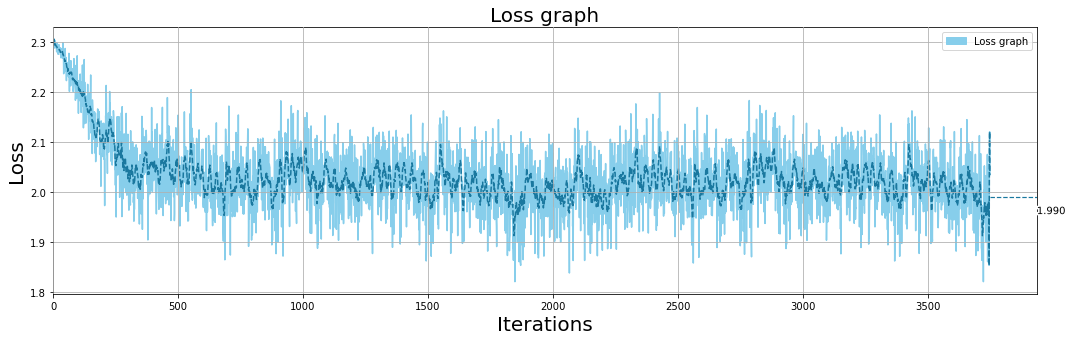

In [15]:
# wd
plot_loss(loss_list)

In [16]:

#wd
test_dataset = MNIST(root='../data', train=False, transform=ToTensor(), download=True)

with torch.no_grad():
    y_test_hat_ohe = model(test_dataset.data.reshape(-1, n_features).float())

y_test = test_dataset.targets.numpy()
y_test_hat = y_test_hat_ohe.argmax(1).numpy()

correct = (y_test_hat==y_test)
accuracy = correct.sum() / len(y_test)
accuracy

0.642